In [1]:
# 文本通常只是数据集中的字符串，但并非所有字符串特征都应该被当做文本来处理，常见四种类型
# 分类数据、可以在语义上映射为类别的自由字符串、结构化字符串数据、文本数据
# 在文本分析的语境中，数据集通常被称为语料库，每个由单个文本表示的数据点被称为文档

In [16]:
# 示例应用：电影评论的情感分析
# 使用aclimdb数据集，数据集包含评论文本，及一个标签用于表示该评论是“正面的”还是“负面的”
from sklearn.datasets import load_files

# load_files返回一个Bunch对象，其中包含训练文本和训练标签
reviews_train = load_files("./data/aclimdb/train/")
text_trian, y_train = reviews_train.data, reviews_train.target
print("tpye of text_train:{}".format(type(text_trian)))
print("length of text_train:{}".format(len(text_trian)))
print("text_train[1]:\n{}".format(text_trian[1]))

tpye of text_train:<class 'list'>
length of text_train:75000
text_train[1]:
b"Amount of disappointment I am getting these days seeing movies like Partner, Jhoom Barabar and now, Heyy Babyy is gonna end my habit of seeing first day shows.<br /><br />The movie is an utter disappointment because it had the potential to become a laugh riot only if the d\xc3\xa9butant director, Sajid Khan hadn't tried too many things. Only saving grace in the movie were the last thirty minutes, which were seriously funny elsewhere the movie fails miserably. First half was desperately been tried to look funny but wasn't. Next 45 minutes were emotional and looked totally artificial and illogical.<br /><br />OK, when you are out for a movie like this you don't expect much logic but all the flaws tend to appear when you don't enjoy the movie and thats the case with Heyy Babyy. Acting is good but thats not enough to keep one interested.<br /><br />For the positives, you can take hot actresses, last 30 minutes, s

In [17]:
# 清洗文本中存在的HTML换行符
text_trian = [doc.replace(b"<br />", b" ") for doc in text_trian]

In [18]:
# 过滤掉标签为2的数据
import pandas as pd
def filter_data(X, y):
    df = pd.DataFrame({'data': text_trian,
                          'class': y_train})
    df_new = df[df['class']!=2]
    return df_new['data'], df_new['class']

In [19]:
text_trian, y_train = filter_data(text_trian, y_train)

In [20]:
# 加载测试数据
import numpy as np

reviews_test = load_files("./data/aclimdb/test")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


In [7]:
# 文本数据并不是机器学习可以处理的格式，我们需要将文本的字符串表示转换为数值表示

In [8]:
# 将文本数据表示为词袋 是用于机器学习的文本表示的一种最简单也是最有效且常用的方法
# 使用这种表示时我们舍弃文本的机构，只计算语料库中每个单词在每个文本中出现的频次
# 对于文档语料库，计算词袋表示包括以下三个步骤：
# ①分词：将每个文档划分为出现在其中的单词(成为词例)，比如按空格和标点划分
# ②构建词表：收集一个词表，里面包含出现在任意文档中的所有词，并进行编号(比如按字母排序)
# ③编码：对于每个文档，计算词表中每个单词在该文档中出现的频次

In [21]:
# 词袋表示是在CountVectorizer中实现，它是一个转换器(transfromer)
from sklearn.feature_extraction.text import CountVectorizer

bards_words = ["The fool doth think he is wise,",
               "but the wise man knows himself to be a fool"]
vect = CountVectorizer()
vect.fit(bards_words)
# 可通过vocabulary_属性来访问词表
print("Vocabulary size:{}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n{}".format(vect.vocabulary_))

Vocabulary size:13
Vocabulary content:
{'knows': 7, 'he': 4, 'wise': 12, 'think': 10, 'doth': 2, 'fool': 3, 'be': 0, 'but': 1, 'the': 9, 'is': 6, 'himself': 5, 'man': 8, 'to': 11}


In [22]:
# 创建训练数据的词袋表示
bag_of_words = vect.transform(bards_words)
print("bag_of_words:{}".format(repr(bag_of_words)))

bag_of_words:<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [23]:
# 词袋表示保存在一个Scipy稀疏矩阵中，这种格式只保存非零元素，每个特征对应词表中一个单词
# 查看稀疏矩阵的实际内容，可使用toarray方法将其转换为“密集的”NumPy数组(保存所有0元素)
# 但是对于真实数据将会导致MemoryError(内存错误)
print("Dense representation of bag_of_words:\n{}".format(bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [24]:
# 将词袋应用于电影评论数据
vect = CountVectorizer().fit(text_trian)
X_train = vect.transform(text_trian)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [13]:
# 访问词表的还可使用向量器的get_feature_name方法它将返回一个列表,每个元素对应一个特征
feature_names = vect.get_feature_names()
print("Number of features:{}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features:74849
First 20 features:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
Features 20010 to 20030:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
Every 2000th feature:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [14]:
# 尝试在未改进特征提取的数据上进行分类训练，对高维稀疏数据，类似逻辑回归的线性模型效果好
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, 
                                                cv=5)
print("Mean cross-validation accuracy:{:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy:0.88


In [15]:
# 尝试使用网格搜索交叉验证来调节正则化参数C
from sklearn.model_selection import GridSearchCV

parm_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
            'max_iter':[1000]}
grid = GridSearchCV(LogisticRegression(), parm_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))
print("Besr parameters:", grid.best_params_)

d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

Best cross-validation score:0.89
Besr parameters: {'C': 0.1, 'max_iter': 1000}


In [16]:
# 在测试集上评估
X_test = vect.transform(text_test)
print("Test-set score:{:.2f}".format(grid.score(X_test, y_test)))

Test-set score:0.88


In [17]:
# 尝试改进单次提取
# CountVectorizer使用正则表达式提取词例，默认使用的正则表达式是“\b\w\w+\b”，然后会
# 将所有的单词转换为小写字母；前面我们还得到了许多不包含任何信息量的特征(比如数字),
# 减少这些特征的一种方法就是设置仅使用至少在n个文档中出现过的词例

In [25]:
# min_df参数设置词例至少出现次数
vect = CountVectorizer(min_df=5).fit(text_trian)
X_train = vect.transform(text_trian)
print("X_train with min_df:{}".format(repr(X_train)))

X_train with min_df:<25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [19]:
feature_names = vect.get_feature_names()
print("First 50 feature:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 feature:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
Features 20010 to 20030:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Every 700th feature:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciatio

In [20]:
grid = GridSearchCV(LogisticRegression(), parm_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))
print("Besr parameters:", grid.best_params_)

d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

Best cross-validation score:0.89
Besr parameters: {'C': 0.1, 'max_iter': 1000}


In [21]:
# 虽然网格搜索最佳验证的精度没有提升，但减少要处理的特征数量可以加速处理过程
# 舍弃无用特征也可能提高模型的可解释性

In [22]:
# 停用词 删除没有信息量的单词还有另一种方法，就是舍弃那些出现次数太多以至于没有信息量的
# 单词，有两种主要方法：使用特定语言的停用词列表，或者舍弃那些出现过于频繁的单词

In [23]:
# scikit-learn的feature_extraction.text模块中提供了英语停用词的内置列表
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print("Number of step words:{}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of step words:318
Every 10th stopword:
['own', 'take', 'becoming', 'fifteen', 'formerly', 'third', 'our', 'well', 'full', 'moreover', 'serious', 'system', 'perhaps', 'seeming', 'made', 'anyhow', 'wherein', 'next', 'anyway', 'indeed', 'the', 'no', 'also', 'describe', 'we', 'ie', 'latter', 'how', 'when', 'any', 'twelve', 'one']


In [24]:
# 指定stop_words="english"将使用内置列表，我们也可以扩展这个列表并传入我们自己的列表
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_test)
X_train = vect.transform(text_trian)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<25000x26445 sparse matrix of type '<class 'numpy.int64'>'
	with 2120667 stored elements in Compressed Sparse Row format>


In [25]:
# 特征数量比前面减少了305个，说明大部分停用词都出现了
grid = GridSearchCV(LogisticRegression(), parm_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))

Best cross-validation score:0.88


In [26]:
# 使用停用词后的网格搜索性能略有下降，但鉴于从27000多个特征中删除305个不太可能对性能
# 和解释性造成很大影响，所以使用这个列表似乎是不值得，固定列表主要对小型数据集很有帮助，
# 这些数据集可能没有包含足够的信息，模型从数据本身无法判断哪些单词是停用词
# 可以尝试另一种方法，通过设置max_df参数来舍弃高频单词
vect = CountVectorizer(min_df=5, max_df=10000).fit(text_test)
X_train = vect.transform(text_trian)
print("X_train with stop words:\n{}".format(repr(X_train)))
grid = GridSearchCV(LogisticRegression(), parm_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))

X_train with stop words:
<25000x26709 sparse matrix of type '<class 'numpy.int64'>'
	with 2711464 stored elements in Compressed Sparse Row format>
Best cross-validation score:0.89


In [27]:
# 词频-逆文档频率(tf-idf) 是一种按照我们预计的信息量大小老缩放特征，而不是舍弃那些认为
# 不重要的特征，这一方法对某个特定文档中将常出现的术语给予很高的权重，但对在语料库中的
# 许多文档中都经常出现的术语给予的权重却不高
# scikit-learn在两个类中实现了tf-idf方法：TfidfTransformer和TfidfVectorizer
# TfidfTransfromer接受CountVectorizer生成的稀疏矩阵并将其变换
# TfidfVectorizer接受文本数据并完成词袋特征提取与tf-idf变换
# 单词w在文档d中的tf-idf分数计算公式：tfinf(w,d) = tf log ((N+1) / (Nw+1)) + 1
# 其中N是训练集中的文档数量，Nw是训练集中出现单词w的文档数量，tf(词频)是单词w在文档d中
# 出现的次数，这两个类在完成tf-idf表示后还应用了L2范数进行缩放

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_trian, y_train)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))

d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

Best cross-validation score:0.89


d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
# 我们可以查看tf-idf找到的最重要的单词，tf-idf缩放的目的是找到能够区分文档的单词，但是
# 它完全是一种无监督技术，因此这里的“重要”不一定与分类结果标签相关
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(text_trian)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())
print("Features with lowest tfidf:\n{}".format(
                feature_names[sorted_by_tfidf[:20]]))
print("Features with highest tfidf:\n{}".format(
                feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
Features with highest tfidf:
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [30]:
# 我们还可以查看找到的逆行文档频率较低的单词，即出现次数很多，但被认为不那么重要的单词
# 逆文档频率值被保存在idf_属性中
sorted_by_tfidf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
            feature_names[sorted_by_tfidf[:100]]))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


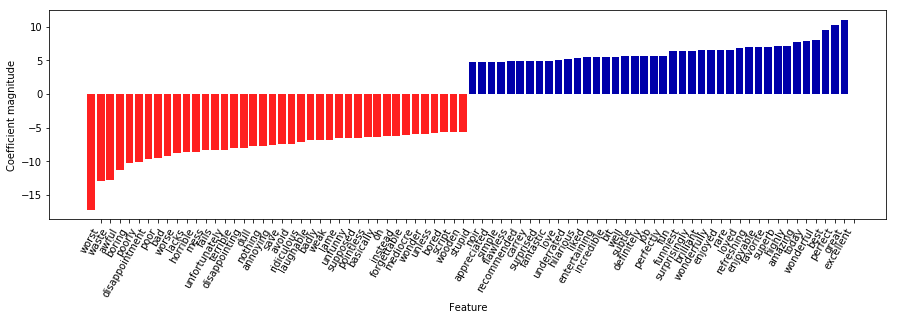

In [31]:
# 研究模型系数  
# 查看逻辑回归模型中最大的25个系数与最小的25个系数，左侧的负系数属于模型找到的表示
# 负面评论的单词，右侧的正系数属于模型找到的表示正面评价的单词
%matplotlib inline
import mglearn

mglearn.tools.visualize_coefficients(
        grid.best_estimator_.named_steps["logisticregression"].coef_,
        feature_names, n_top_features=40)

In [32]:
# 多个单词的词袋(n元分词)
# 使用词袋表示主要缺点之一是完全舍弃了单词顺序，因此含义相反的两句话的词袋表示可能相同，
# 好在使用词袋表示时有一种获取上下文的方法，不仅考虑单一词例的计数，还考虑相邻的词例计数
# 两个词例被称为二元分词，三个词例被称为三元分词，更一般的词例被称为n元分词
# ngram_range参数可设置作为特征的词例的范围，它是一个元祖，包含词例序列的最小、大长度


In [33]:
print("bards_wordsL\n{}".format(bards_words))

bards_wordsL
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [34]:
# 默认情况下为每个长度最小为1且最大为1的词例序列创建一个特征，单个词例也称一元分词
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("Vocabulary size:{}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size:13
Vocabulary:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [35]:
# 尝试二元分词
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("Vocabulary size:{}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size:14
Vocabulary:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [36]:
# 使用更长的词例序列通常会得到更多的特征，也会得到更多具体的特征

In [37]:
print("Transformed data (dense):\n{}".format(cv.transform(bards_words).toarray()))

Transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [39]:
# 使用一元、二元、三元分词
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("Vocabulary size:{}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size:39
Vocabulary:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [40]:
#　对于大多数的应用而言，最小的词例数量应该是1，因为单个单词通常包含丰富的含义，添加二元
# 分词会有所帮助，添加更长的序列(一直到五元分词)也可能会有帮助，但会导致特征数量大大增加
# 也会导致过拟合

In [42]:
# 在IMDB电影评论数据上尝试使用TfidfVectorizer，并利用网格搜索找出n元分词的最佳设置
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {"logisticregression__C":[0.001, 0.01, 0.1, 1, 10, 100],
             "tfidfvectorizer__ngram_range":[(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_trian, y_train)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

Best cross-validation score:0.91
Best parameters:
{'tfidfvectorizer__ngram_range': (1, 3), 'logisticregression__C': 100}


d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


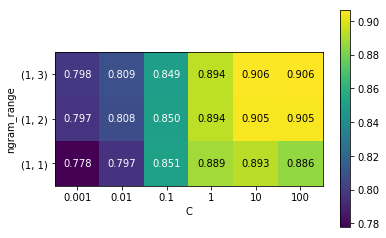

In [44]:
# 因为网络相对较大，且包含三元分词，运行网格搜索时间很长
# 从结果中可以看出，添加了二元分词与三元分词特征之后，性能提高了一个百分点
# 将交叉验证的精度作为ngram_range和C参数的函数并用热图可视化
import matplotlib.pyplot as plt

scores = grid.cv_results_['mean_test_score'].reshape(-1,3).T
heatmap = mglearn.tools.heatmap(scores, xlabel="C", ylabel="ngram_range",
        cmap="viridis", fmt="%.3f", 
        xticklabels=param_grid['logisticregression__C'],
        yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

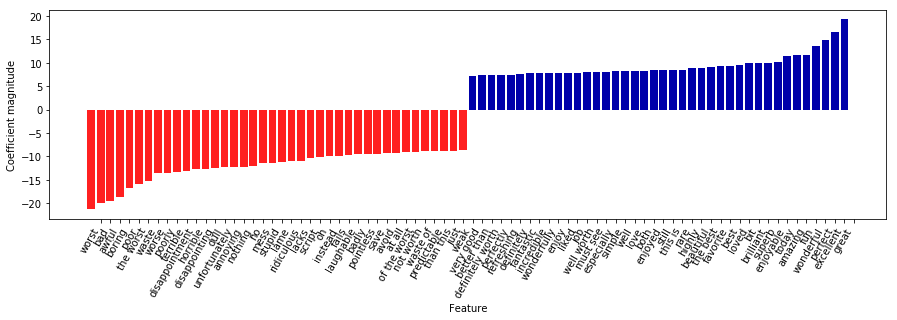

In [46]:
# 从热图中可以看出，使用二元分词对性能有很大提升，而添加三元分词对精度只有很小贡献
# 将最佳模型的重要系数可视化
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

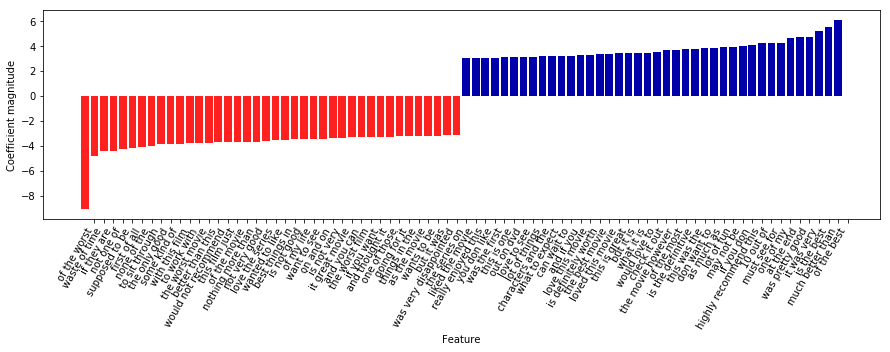

In [48]:
# 只将三元分词可视化
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                            feature_names[mask], n_top_features=40)

In [37]:
# 高级分词、词干提取与词形还原
# 在更加复杂的文本处理中，通常需要改进步骤是词袋模型第一步：分词，定义一个单词如何构成的
# 将一个单词的不同形式提取为不同的单词，这会增加过拟合，并导致模型无法充分利用训练数据，
# 不利用构建具有良好泛化性能的模型，这个问题可以通过词干表示每个单词来解决，这一方法涉及
# 找出所有具有相同词干的单词，如果使用基于规则的启发来实现(比如删除常见的后缀)，那么通常
#　将其称为词干提取；如果使用的是由已知单词形式组成的字典(明确的且经过人工验证的系统)，
# 并且考虑了单词在句子中的使用，那么这个过程被称为词形还原，单词的标准化形式被称为词元

In [8]:
# nltk包的 Porter词干提取器，一种广泛使用的启发法集合
# spacy包中实现的词形还原  安装spacy包后，使用python3 -m spacy download en下载英语包
import spacy
import nltk

en_nlp = spacy.load('en')
stemmer = nltk.stem.PorterStemmer()
# 定义一个函数来对比spacy中的词形还原与nltk中的词干提取
def compare_normalization(doc):
    doc_spacy = en_nlp(doc)
    print("Lemmatization:\n{}".format([token.lemma_ for token in doc_spacy]))
    print("Stemming:\n{}".format([stemmer.stem(token.norm_.lower()) for 
                                token in doc_spacy]))


In [14]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                      "I'm scared of meeting the clients tomorrow.")

Lemmatization:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [15]:
# 词干提取器总是局限于讲单词简化为词干，因此“was”变成“wa”，而词干还原可以得到正确的动词
# 基本形式“be”，一般来说词形还原是一个比词干提取更复杂的过程，但用于机器学习的词例标准化
# 时通常可以给出比词干提取更好的结果，虽然scikit-learn没有实现这两种形式的标准化，但
# CountVectorizer允许使用tokenizer参数来制定使用你自己的分词器将每个文档转换为词例列表

In [32]:
import re

regexp = re.compile('(?u)\\b\\w\\w+\\b')
en_nlp = spacy.load('en')
old_tokenizer = en_nlp.tokenizer
# 将分词器替换为正则表达式
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
                                                regexp.findall(string))
# 使用spacy文档处理管道创建一个自定义的分词器
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]
# 利用自定义的分词器来定义一个计数向量器
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)
X_train_lemma = lemma_vect.fit_transform(text_trian)
print("X_train_lemma.shape:{}".format(X_train_lemma.shape))
# 标准化的CountVectorizer()
vect = CountVectorizer(min_df=5).fit(text_trian)
X_train = vect.transform(text_trian)
print("X_train.shape:{}".format(X_train.shape))

X_train_lemma.shape:(25000, 21752)
X_train.shape:(25000, 27271)


In [35]:
# 可以看出词形还原特征数量明显要比标准的CountVectorizer少，词形还原还可以被看做是一种
# 正则化，因为它合并了某些特征，因此我们预计，数据集很小时词形还原对性能提升很大

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
# 仅使用1%的数据作为训练数据，其余数据作为测试数据
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99, train_size=0.01, 
                            random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
grid.fit(X_train, y_train)
print("Best cross-validation score "
      "(standard CountVectorizer): {:.3f}".format(grid.best_score_))
# 利用词形还原进行网格搜索
grid.fit(X_train_lemma, y_train)
print("Best cross-validation score "
      "(lemmatization): {:.3f}".format(grid.best_score_))

d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

Best cross-validation score (standard CountVectorizer): 0.718


d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

Best cross-validation score (lemmatization): 0.729


d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
# 主题建模与文档聚类 是常用于文本数据的一种特殊技术，是将每个文档分配给一个或多个主题的
# 任务的概括性术语，如果为每个文档分配一个主题，那么这是一个文档聚类任务；如果每个文档
# 可以有多个主题，文档表示中的成分系数告诉我们这个文档与该主题的相关性强弱
# 主题建模通常指的是一种叫做隐含狄利克雷分布(LDA)的特定分解方法，从直观上来看，
# 隐含狄利克雷分布模型试图找出频繁共同出现的单词群组(即主题)，每个文档可以被理解为主题
# 子集的“混合“，机器学习模型所谓的主题并不是我们通常所说的主题，而是更类似于PCA或NMF所
# 提取的成分，它可能具有语义，也可能没有。

In [39]:
# 将LDA应用于电影评论数据集，对于无监督的文本文档模型，通常最好删除非常常见的单词，否则
# 它们可能会支配分析过程
# 我们至少删除在15%的文档中出现过的单词，并在删除后将词袋模型限定为最常见的10000个单词
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_trian)

In [41]:
# 设置主题个数为10，与NMF的分量类似，主题没有内在的顺序，而改变主题数量将会改变所有主题
from sklearn.decomposition import LatentDirichletAllocation

# 使用“batch”方法学习，它比默认的方法“online”稍慢，但通常会给出更好的结果
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", 
                                max_iter=25, random_state=0)
documens_topics = lda.fit_transform(X)

In [44]:
# components_属性保存了每个单词对每个主题的重要性，大小为(n_components, n_words)
lda.components_.shape

(10, 10000)

In [55]:
# 查看每个主题中最重要的单词
import mglearn

# components_中的行对应每个主题，其中特征是升序排序，查看最重要的10个，需要变为降序
sorting = np.argsort(lda.components_, axis=1)[:,::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                          sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
real          world         comedy        series        saw           
young         us            guy           episode       thought       
family        our           re            tv            am            
performance   american      laugh         episodes      got           
both          documentary   stupid        shows         10            
beautiful     history       thing         new           thing         
work          years         fun           season        want          
each          new           worst         years         watched       
director      own           actually      musical       going         


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
acti

In [58]:
# 尝试使用100个主题
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
documens_topics100 = lda100.fit_transform(X)
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
horror        stupid        new           guy           game          play          war           
mystery       worst         city          gets          team          role          world         
atmosphere    crap          york          house         football      actors        japanese      
murder        want          young         around        sports        cast          german        
house         terrible      midnight      girl          johnny        performance   soldier       
ghost         awful         between       goes          alex          excellent     japan         
thriller      boring        past          car           canadian      performances  american      
director      horrible      both          down          young         actor         ii            
dark      

In [100]:
# 如果想利用发现的主题做出进一步的推断，那么我们应该查看分配给这些主题的文档来验证
music = np.argsort(documens_topics100[:, 53])[::-1]
# 打印出这个主题最重要的前10个文档
text_train = text_trian.reset_index(drop=True)
for i in music[:10]:
 # 显示前两个句子
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")


b'This movie will always be a Broadway and Movie classic, as long as there are still people who sing, dance, and act..\n'
b'Gene Kelly, Frank Sinatra, Kathryn Grayson, and Jose Iturbi star in "Anchors Aweigh," directed by George Sidney.  Kelly and Sinatra are Joe and Clarence, two navy guys on leave in Hollywood.\n'
b"Such energy and vitality. You just can't go wrong with Busby Berkley films and this certainly must be his best.\n"
b'Two sailors are on leave--ladies man Joseph Brady (Gene Kelly) and shy innocent Clarence Doolittle (Frank Sinatra). They meet beautiful Susan Abbott (Kathryn Grayson) and both fall in love with her.\n'
b'One of the first of the best musicals, Anchors Aweigh features several memorable musical sequences, such as Kelly dancing with Jerry the mouse, Kelly dancing with 7-year-old Sharon McManus, Sinatra singing with Jose Iturbi playing piano, Kathryn Grayson singing with Iturbi conducting, and much more. The Technicolor is perfect, with some innovative camera wo

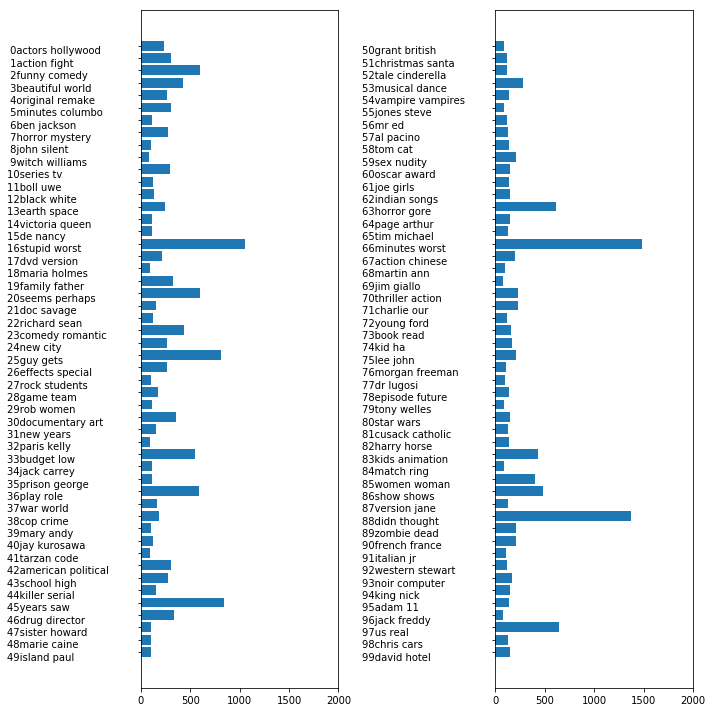

In [104]:
# 查看主题还有一种有趣的方法，通过对所有评论的documents_topics进行求和来查看每个主题
# 所获得的整体权重，我们用最常见的两个单词作为每个主题的命名来查看
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2}".format(i) + " ".join(words) for i, words in 
              enumerate(feature_names[sorting[:, :2]])]
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(documens_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

In [106]:
# 在没有标签的情况下，像LDA这样的主题模型是理解大型文本语料库的有趣方法，不够LDA算法是
# 随机的，改变随机种子可能会得到完全不同的结果，虽然找到的主题可能很有用，但对于从无监督
# 模型中得到的结论都应该保持保留态度；LDA.transform方法生成的主题有时也可用于监督学习的
# 紧凑表示，当训练样例很少时，这一方法特别有用